In [501]:
#importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import scipy.stats
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import yfinance as yf
import random
from scipy.optimize import minimize

In [293]:
#Start and end Date
end =datetime.today()
start = end - timedelta(days = 60)#change days

In [557]:
stocks = ['NVDA','TSLA','AMD','RIVN','AAPL','NIO','INTC','PLTR','SIRI','BBD','F','SOFI','LCID','AAL','AMZN','MARA','T','KVUE','SNAP','HBAN','PFE','MU','GME','CCL','VALE']
portfolio = pd.DataFrame()

In [558]:
for stock in stocks:
    stock = yf.download(stock,start,end)
    stock = stock['Adj Close']
    portfolio = pd.concat([portfolio,stock],axis=1)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [559]:
portfolio.columns = stocks
portfolio

,NVDA,TSLA,AMD,RIVN,AAPL,NIO,INTC,PLTR,SIRI,BBD,...,MARA,T,KVUE,SNAP,HBAN,PFE,MU,GME,CCL,VALE
2024-05-13 00:00:00,90.391579,171.889999,150.559998,10.900000,186.279999,5.41,30.510000,20.940001,3.14,2.518283,...,17.260000,17.004772,20.360001,15.760000,13.785077,28.440001,122.892517,30.450001,14.560000,12.57
2024-05-14 00:00:00,91.348495,177.550003,153.160004,11.190000,187.429993,5.79,31.049999,21.440001,3.17,2.518283,...,18.070000,17.044180,20.629999,15.620000,13.903573,28.379999,124.700928,48.750000,14.520000,12.56
2024-05-15 00:00:00,94.622223,173.990005,159.669998,10.200000,189.720001,5.33,31.270000,21.670000,3.04,2.498986,...,20.200001,17.073736,20.540001,16.209999,14.081318,28.820000,127.698311,39.549999,14.860000,12.56
2024-05-16 00:00:00,94.351250,174.839996,162.619995,10.130000,189.839996,5.26,32.029999,21.650000,3.05,2.527931,...,19.650000,17.044180,20.600000,16.020000,13.992445,28.920000,127.778244,27.670000,14.900000,12.66
2024-05-17 00:00:00,92.471397,177.460007,164.470001,10.500000,189.869995,5.28,31.830000,21.760000,3.01,2.547229,...,19.450001,17.142702,20.469999,16.049999,14.031944,28.639999,125.180511,22.209999,15.000000,12.99
2024-05-20 00:00:00,94.772217,174.949997,166.330002,10.280000,191.039993,5.22,32.099998,21.620001,2.99,2.537580,...,22.320000,17.260927,19.900000,16.430000,13.834451,28.530001,128.887268,23.139999,16.090000,12.92
2024-05-21 00:00:00,95.378166,186.600006,164.660004,10.050000,192.350006,5.25,31.740000,21.240000,2.89,2.537580,...,21.350000,17.014624,19.969999,15.630000,13.972695,28.559999,127.388580,22.120001,16.200001,12.88
2024-05-22 00:00:00,94.942200,180.110001,165.520004,10.700000,190.899994,5.24,31.420000,21.170000,2.80,2.450743,...,21.240000,17.241222,19.879999,15.910000,13.745578,29.600000,126.169647,21.120001,15.650000,12.65
2024-05-23 00:00:00,103.790482,173.740005,160.429993,9.950000,186.880005,4.80,30.080000,20.719999,2.73,2.421797,...,20.080000,17.211666,19.440001,15.180000,13.409838,28.690001,126.159653,18.320000,14.780000,12.58
2024-05-24 00:00:00,106.460258,179.240005,166.360001,10.440000,189.979996,4.83,30.719999,21.010000,2.75,2.421797,...,21.209999,17.241222,19.350000,15.220000,13.567833,28.879999,129.376846,19.000000,15.130000,12.60


In [560]:
#Calculate log daily returns
#Remove NaN row
portfolio_log_return = np.log(1+portfolio.pct_change())
portfolio_log_return = portfolio_log_return.dropna()


In [561]:
#Calculate covariance
portfolio_cov = portfolio_log_return.cov()
portfolio_cov



,NVDA,TSLA,AMD,RIVN,AAPL,NIO,INTC,PLTR,SIRI,BBD,...,MARA,T,KVUE,SNAP,HBAN,PFE,MU,GME,CCL,VALE
NVDA,0.001007,-0.000094,-0.000076,-0.000301,-0.000019,-0.000186,-0.000055,-7.222739e-05,0.000027,-0.000104,...,0.000202,-0.000136,-0.000191,0.000013,-0.000194,-0.000151,0.000554,0.000532,0.000146,-9.347800e-05
TSLA,-0.000094,0.000904,0.000062,0.000546,0.000173,0.000643,0.000092,3.265051e-05,0.000501,0.000104,...,-0.000014,-0.000091,0.000113,-0.000055,0.000123,-0.000115,0.000107,0.000397,0.000060,1.182265e-04
AMD,-0.000076,0.000062,0.000591,-0.000095,0.000045,-0.000094,0.000261,1.491307e-04,0.000086,0.000106,...,0.000068,0.000021,0.000039,0.000227,0.000173,0.000093,-0.000059,0.000568,0.000104,1.025184e-05
RIVN,-0.000301,0.000546,-0.000095,0.002842,0.000221,0.001188,0.000088,1.339866e-04,-0.000102,-0.000047,...,-0.000036,0.000037,0.000065,0.000332,-0.000045,-0.000026,0.000149,0.001554,0.000339,-5.077569e-05
AAPL,-0.000019,0.000173,0.000045,0.000221,0.000266,0.000110,0.000050,1.317168e-04,0.000053,0.000017,...,0.000199,-0.000034,0.000033,0.000138,0.000018,0.000010,0.000113,0.000236,0.000050,-2.682813e-05
NIO,-0.000186,0.000643,-0.000094,0.001188,0.000110,0.001693,0.000046,1.443835e-05,0.000462,0.000040,...,0.000069,0.000033,0.000159,-0.000144,0.000131,0.000054,0.000274,0.000968,0.000032,6.778755e-05
INTC,-0.000055,0.000092,0.000261,0.000088,0.000050,0.000046,0.000314,9.344818e-05,0.000009,0.000049,...,0.000027,0.000023,0.000057,0.000144,0.000076,0.000026,0.000043,0.000113,0.000119,-4.264492e-06
PLTR,-0.000072,0.000033,0.000149,0.000134,0.000132,0.000014,0.000093,6.425750e-04,0.000024,0.000114,...,0.000398,0.000052,0.000073,0.000113,0.000055,0.000066,0.000017,0.001193,0.000014,-6.868007e-07
SIRI,0.000027,0.000501,0.000086,-0.000102,0.000053,0.000462,0.000009,2.379395e-05,0.001936,0.000153,...,-0.000152,-0.000037,0.000035,-0.000036,-0.000007,-0.000065,0.000061,0.000652,-0.000282,2.492488e-04
BBD,-0.000104,0.000104,0.000106,-0.000047,0.000017,0.000040,0.000049,1.136268e-04,0.000153,0.000210,...,-0.000154,0.000002,0.000044,-0.000033,0.000029,-0.000006,-0.000084,0.000731,-0.000020,1.200073e-04


In [562]:
#Find number of positions
N = len(portfolio.columns)

In [563]:
#Find random weights with sum 1 
def gen_weights(assets):
    
    weights = np.random.random(assets)
    weights = weights/sum(weights)
    
    return weights

In [577]:
#Find random weights with constraints
def generate_const_weights(N):
    
    initial_floats = np.random.uniform(0.00, 0.10, N)
    
    def objective(x):
        return np.sum((x - initial_floats) ** 2)
    #Countraint big positions with 40%
    def constraint_sum_range(x):
        return 0.40 - np.sum(x[(x >= 0.05)])
    #Contraint so no leverage
    def constraint_sum_at_most_one(x):
        return 1 - np.sum(x)
    #Constraint so at least 85% of capital is allocated 
    def constraint_sum_at_least(x):
        return np.sum(x) - 0.85
    #Bounds for random weights 
    bounds = [(0.00, 0.10) for _ in range(N)]
    
    constraints = [
        {'type': 'ineq', 'fun': constraint_sum_range},
        {'type': 'ineq', 'fun': constraint_sum_at_most_one},
        {'type': 'ineq', 'fun': constraint_sum_at_least}
    ]
    
    result = minimize(objective, initial_floats, constraints=constraints, bounds=bounds, options={'disp': False})
    
    floats = result.x
    
    return floats

In [564]:
#Calculates return of the portfolio
def calc_returns(portfolio_log_return,weights):
    
    portfolio_cuml_ret = np.sum(portfolio_log_return.mean()*weights)*len(portfolio_log_return)
    
                        
    return portfolio_cuml_ret

In [565]:
#Calculates volatility of the portfolio
def calc_vol(portfolio_cov,weights):
    
    lifetime_cov = np.dot(portfolio_cov*len(portfolio),weights)
    vol = np.dot(weights.transpose(),lifetime_cov)
    
    return np.sqrt(vol)

In [566]:
weights = gen_weights(len(portfolio.columns))
calc_vol(portfolio_cov,weights)

0.09928000155740328

In [589]:
#Monte Carlo Simulation
mc_return = []
mc_weights = []
mc_vol = []
for sim in range(10000):
    weights = generate_const_weights(len(portfolio.columns))
    mc_weights.append(weights)
    returns = calc_returns(portfolio_log_return,weights)
    mc_return.append(returns)
    vol = calc_vol(portfolio_cov,weights)
    mc_vol.append(vol)
    

In [590]:
mc_sharpe = np.array(mc_return)/np.array(mc_vol)

In [597]:
mc_sharpe.argmax()

4600

In [598]:
mc_return[4600]

0.13172135211227518

In [599]:
mc_weights[4911]

array([0.00280354, 0.01145304, 0.04999998, 0.07106267, 0.07193465,
       0.00955381, 0.02811081, 0.07673767, 0.04999998, 0.01085244,
       0.04788356, 0.03569436, 0.01880929, 0.047607  , 0.00966614,
       0.04996887, 0.03933287, 0.03099103, 0.05438669, 0.0722948 ,
       0.04638403, 0.03607258, 0.07396793, 0.01822835, 0.032921  ])

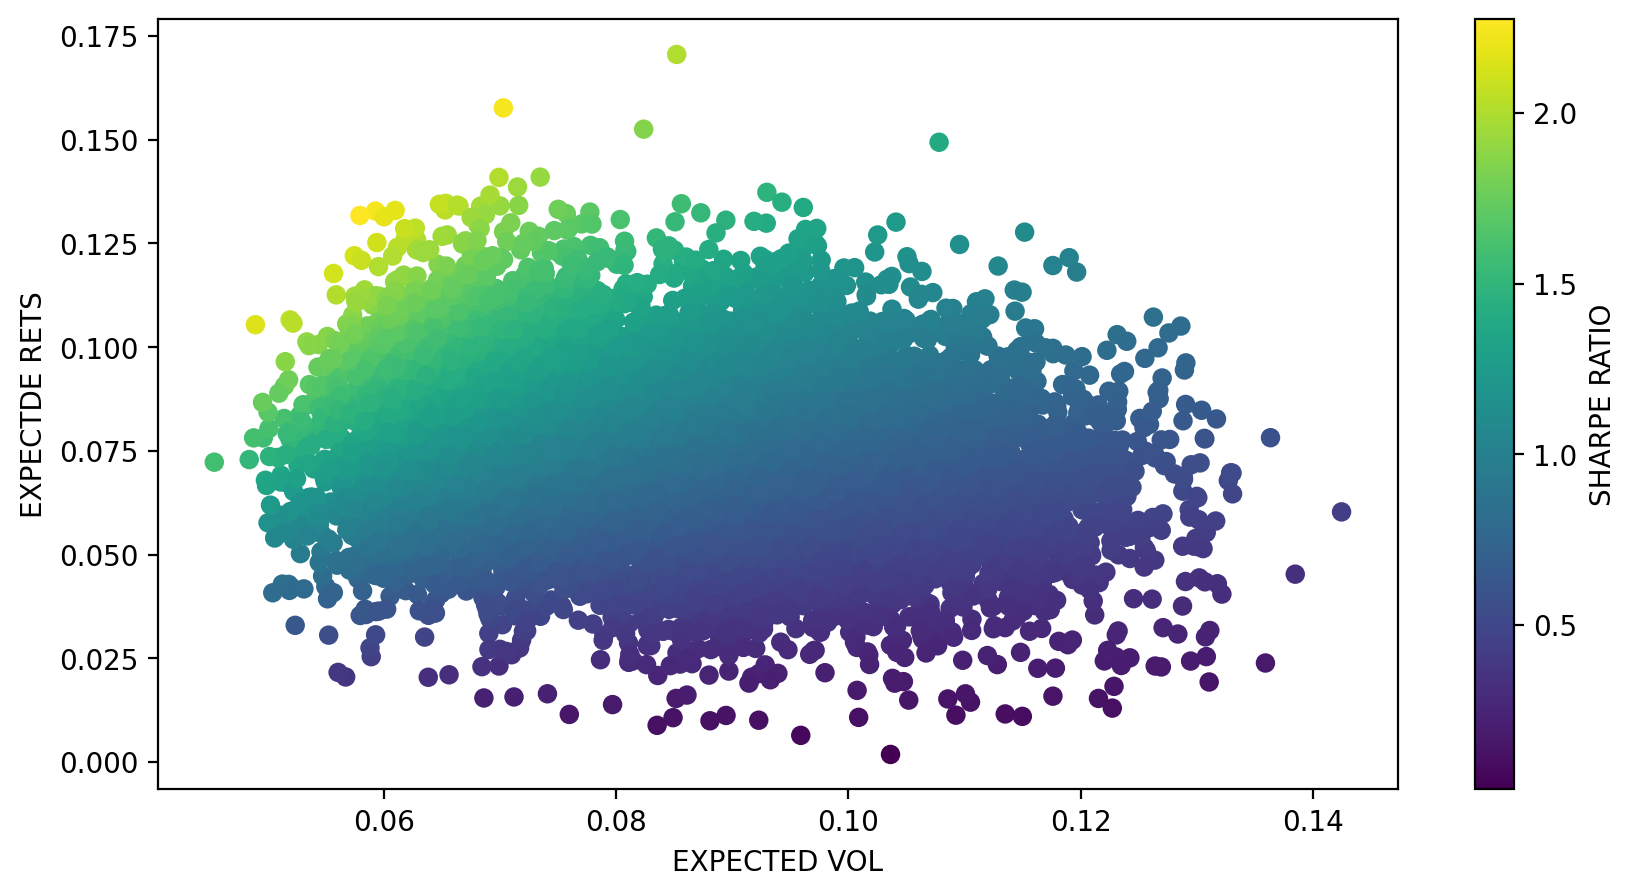

In [594]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_vol,mc_return,c=mc_sharpe)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [556]:
pwd

'/Users/kaloyanpanov/Documents/bocconi/Quant/CODE'